In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/companiesmarketcap.com - Companies ranked by Market Cap - CompaniesMarketCap.com.csv')

In [36]:
df.head(12)

,Rank,Name,Symbol,marketcap,price (USD),country
0,1,Apple,AAPL,3443576799232,226.49000,United States
1,2,NVIDIA,NVDA,3089792499712,125.61000,United States
2,3,Microsoft,MSFT,3052006277120,410.60000,United States
3,4,Alphabet (Google),GOOG,2013891133440,164.50000,United States
4,5,Saudi Aramco,2222.SR,1796323110337,7.40099,Saudi Arabia
5,6,Amazon,AMZN,1792648413184,170.80000,United States
6,7,Meta Platforms (Facebook),META,1307360362496,516.78000,United States
7,8,Berkshire Hathaway,BRK-B,1001000927232,464.59000,United States
8,9,TSMC,TSM,877484703744,169.20000,Taiwan
9,10,Eli Lilly,LLY,854450241536,948.94000,United States


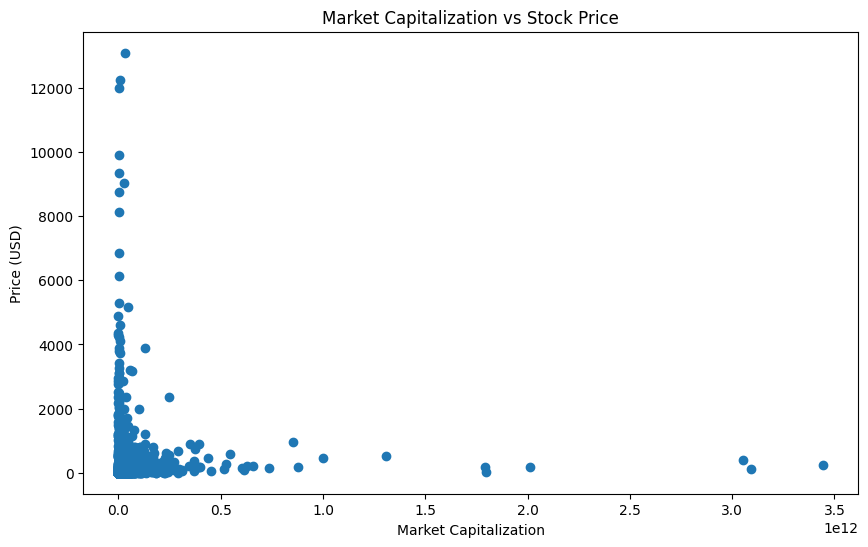

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df['marketcap'], df['price (USD)'])
plt.xlabel('Market Capitalization')
plt.ylabel('Price (USD)')
_ = plt.title('Market Capitalization vs Stock Price')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9432 entries, 0 to 9431
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         9432 non-null   int64  
 1   Name         9432 non-null   object 
 2   Symbol       9431 non-null   object 
 3   marketcap    9432 non-null   int64  
 4   price (USD)  9432 non-null   float64
 5   country      9430 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 442.2+ KB


In [39]:
df.describe()

,Rank,marketcap,price (USD)
count,9432.000000,9.432000e+03,9432.000000
mean,4716.500000,1.165759e+10,69.079935
std,2722.928203,7.622327e+10,399.309063
min,1.000000,0.000000e+00,0.000000
25%,2358.750000,3.169968e+08,2.654590
50%,4716.500000,1.544329e+09,11.489700
75%,7074.250000,6.429764e+09,38.570000
max,9432.000000,3.443577e+12,13100.300000


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


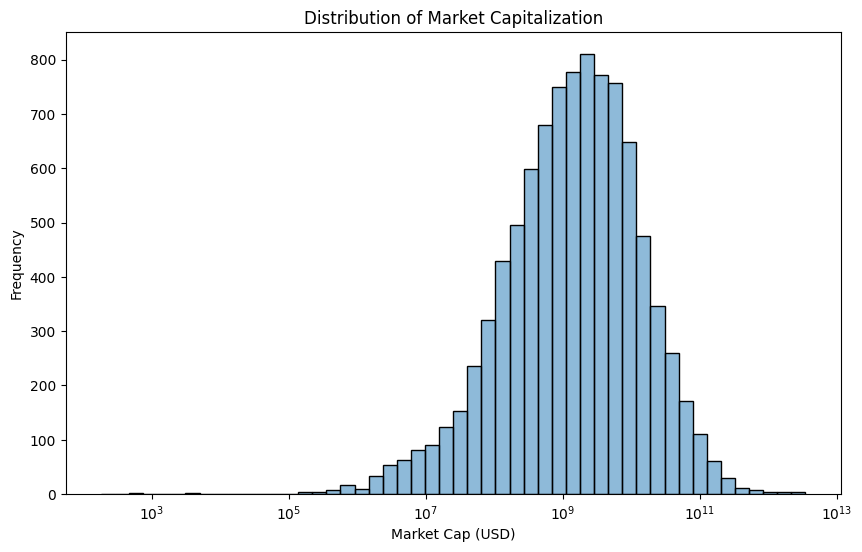

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


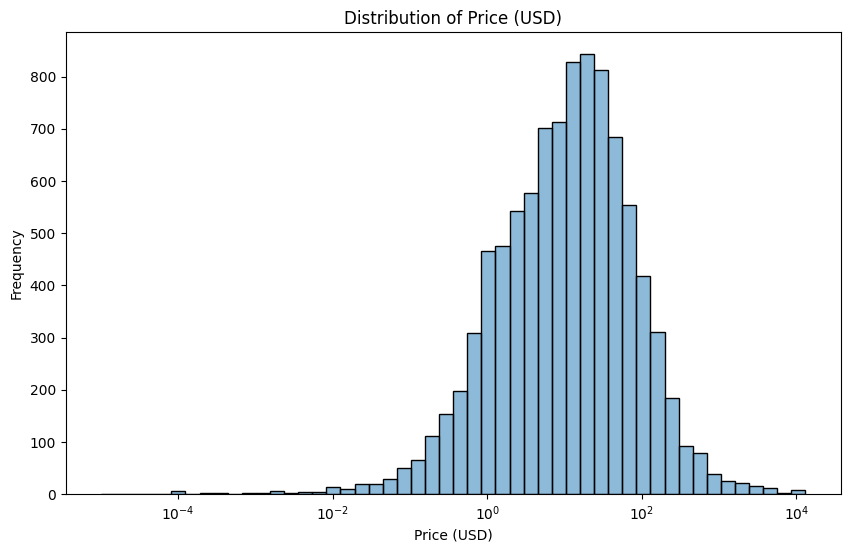

<ipython-input-40-00cc76f268f2>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


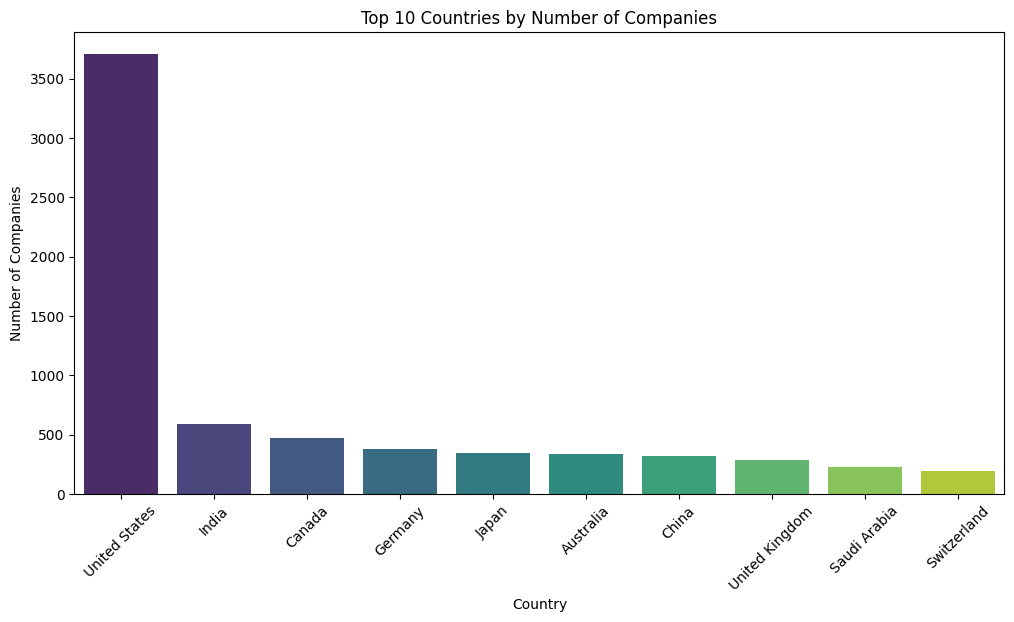

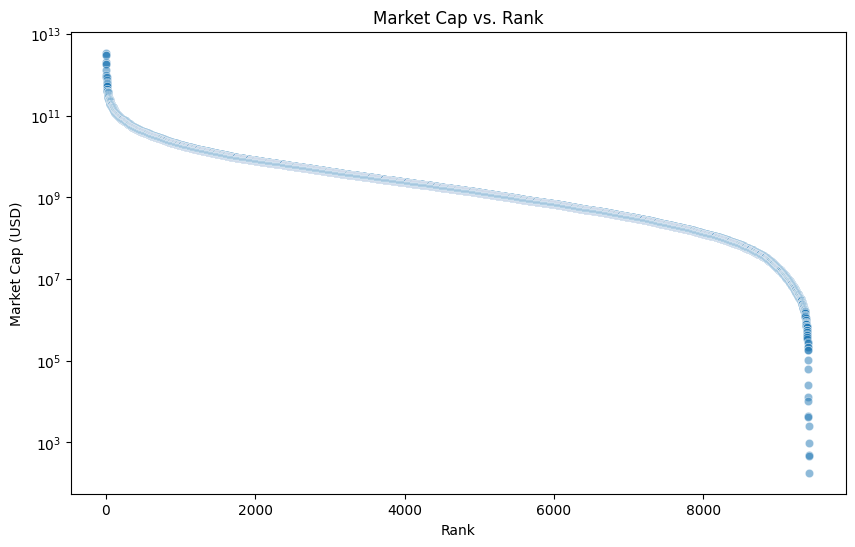

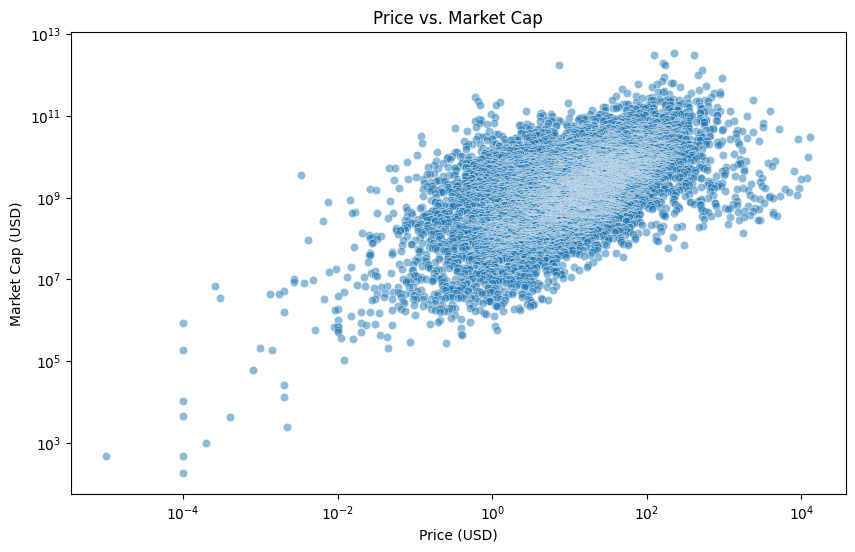

In [40]:
df.dropna(subset=['Symbol', 'country'], inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(df['marketcap'], bins=50, kde=True, log_scale=(True, False))
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Cap (USD)')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['price (USD)'], bins=50, kde=True, log_scale=(True, False))
plt.title('Distribution of Price (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Number of Companies')
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rank', y='marketcap', data=df, alpha=0.5)
plt.title('Market Cap vs. Rank')
plt.xlabel('Rank')
plt.ylabel('Market Cap (USD)')
plt.yscale('log')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price (USD)', y='marketcap', data=df, alpha=0.5)
plt.title('Price vs. Market Cap')
plt.xlabel('Price (USD)')
plt.ylabel('Market Cap (USD)')
plt.xscale('log')
plt.yscale('log')
plt.show()


In [41]:
problematic_marketcap = df[df['marketcap'] <= 0]
problematic_price = df[df['price (USD)'] <= 0]

problematic_marketcap, problematic_price

(      Rank                                       Name         Symbol  \
 9411  9412                                     Yandex        YNDX.ME   
 9412  9413                                       Qiwi        QIWI.ME   
 9413  9414                                    Rosseti        RSTI.ME   
 9414  9415                            X5 Retail Group        FIVE.ME   
 9415  9416                  Pollux Properti Indonesia        POLL.JK   
 9416  9417                   Samsung Heavy Industries      010145.KS   
 9417  9418                               Tunas Ridean        TURI.JK   
 9418  9419                                       Ozon        OZON.ME   
 9419  9420                        Al Dhafra Insurance      DHAFRA.AE   
 9420  9421                         Abu Dhabi Aviation  ADAVIATION.AE   
 9421  9422                             Agility Global     AGILITY.AE   
 9422  9423                              Amlak Finance       AMLAK.AE   
 9423  9424              Drake and Scull Internatio

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
top_10_countries = df.groupby("country")["marketcap"].sum().sort_values(ascending=False).head(10)
print(top_10_countries)

country
United States     57067673778972
China              6231485109949
Japan              5000500479428
India              4733180037020
United Kingdom     3687746567562
France             3004609497097
Canada             2898302219160
Saudi Arabia       2715663718003
Switzerland        2566783181631
Germany            2428671134413
Name: marketcap, dtype: int64


In [44]:
df = pd.get_dummies(df, columns=['country'])

In [45]:
X = df.drop(["Rank", "Name", "Symbol", "marketcap"], axis=1)
y = df["marketcap"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.477482134738649e+21
Root Mean Squared Error: 66913990575.50408
R-squared: -0.07223224784976101


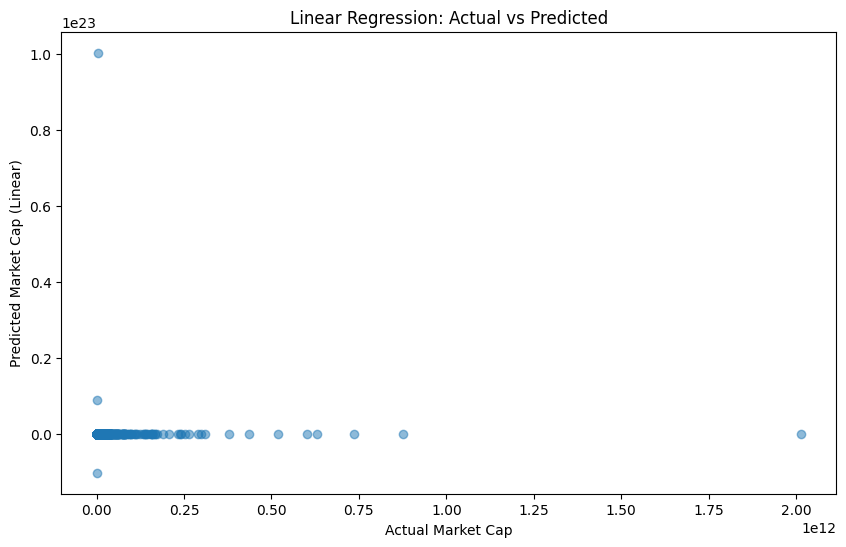

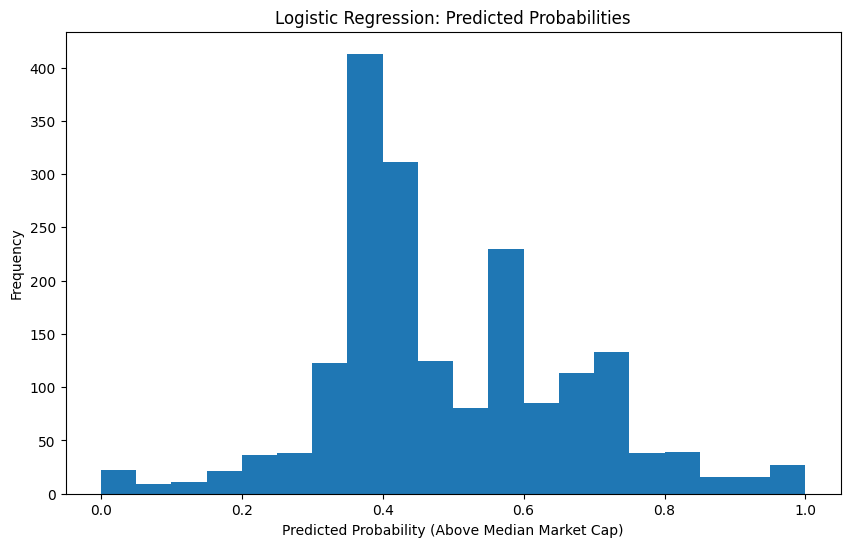

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.xlabel('Actual Market Cap')
plt.ylabel('Predicted Market Cap (Linear)')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


y_median = y.median()
y_train_binary = (y_train > y_median).astype(int)
y_test_binary = (y_test > y_median).astype(int)

logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train_binary)
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba, bins=20)
plt.xlabel('Predicted Probability (Above Median Market Cap)')
plt.ylabel('Frequency')
plt.title('Logistic Regression: Predicted Probabilities')
plt.show()


              Rank     marketcap  price (USD)
count   586.000000  5.860000e+02   586.000000
mean   4172.424915  8.077099e+09    26.445493
std    2376.005008  1.919463e+10    82.754864
min      47.000000  1.527704e+06     0.027182
25%    2111.250000  5.802605e+08     3.222260
50%    4138.000000  2.153719e+09     8.588715
75%    6231.250000  7.441238e+09    22.981425
max    9359.000000  2.427229e+11  1600.790000


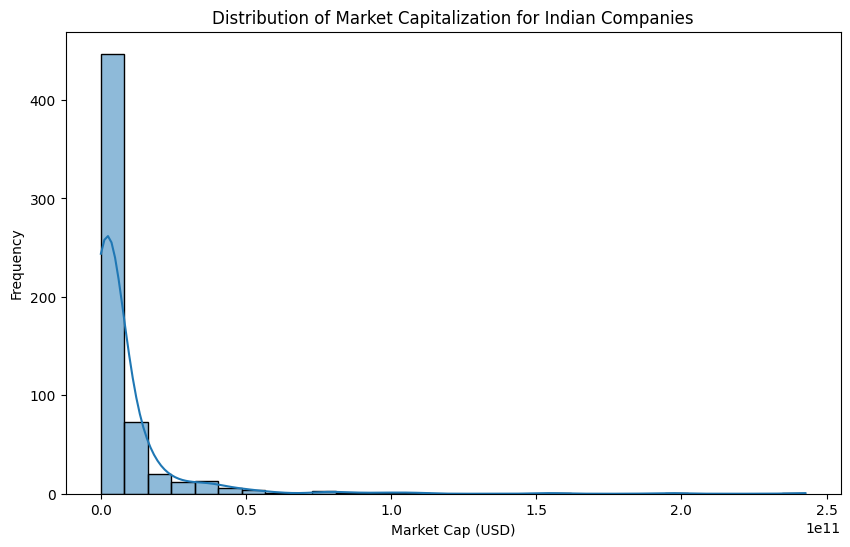

<ipython-input-54-fb086bacea75>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='marketcap', data=top_10_indian, palette='viridis')


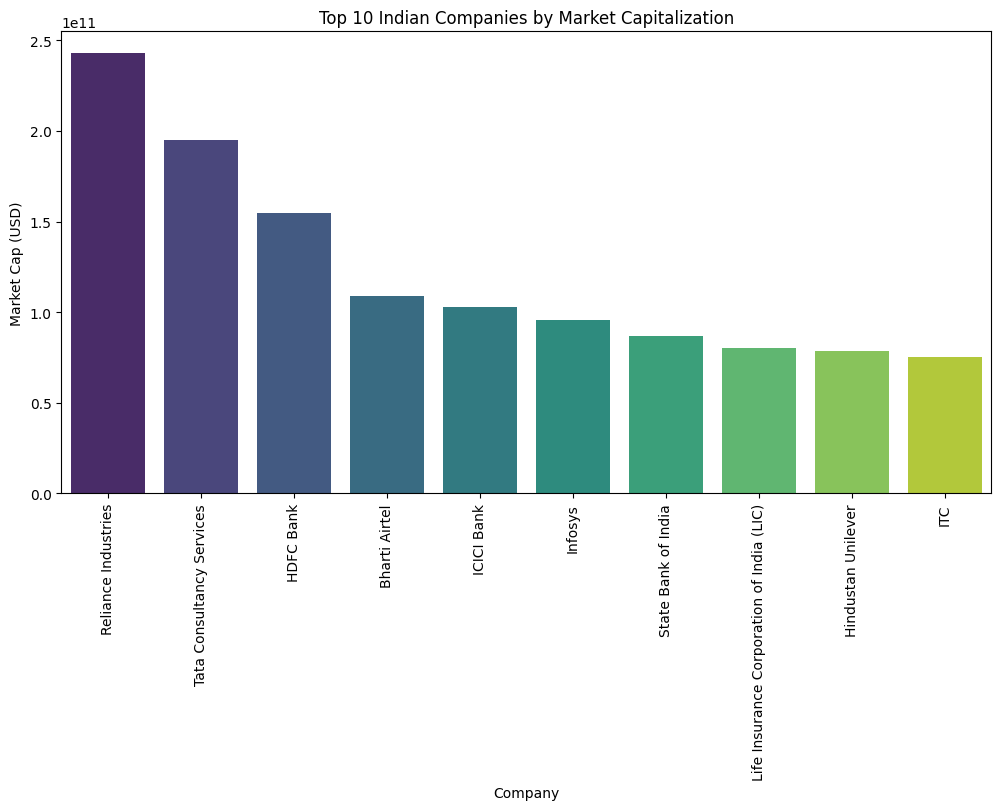

Random Forest Regressor:
  Mean Squared Error: 4.477482134738649e+21
  Root Mean Squared Error: 66913990575.50408
  R-squared: -0.07223224784976101

Logistic Regression:
  Accuracy: 0.6919406150583245
  ROC AUC Score: 0.7564704823614111


In [54]:
indian_companies = df[df['country_India'] == 1]
print(indian_companies.describe())


plt.figure(figsize=(10, 6))
sns.histplot(indian_companies['marketcap'], bins=30, kde=True)
plt.title('Distribution of Market Capitalization for Indian Companies')
plt.xlabel('Market Cap (USD)')
plt.ylabel('Frequency')
plt.show()


top_10_indian = indian_companies.sort_values('marketcap', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='marketcap', data=top_10_indian, palette='viridis')
plt.title('Top 10 Indian Companies by Market Capitalization')
plt.xlabel('Company')
plt.ylabel('Market Cap (USD)')
plt.xticks(rotation=90)
plt.show()


print("Random Forest Regressor:")
print(f"  Mean Squared Error: {mse}")
print(f"  Root Mean Squared Error: {rmse}")
print(f"  R-squared: {r2}")


from sklearn.metrics import accuracy_score, roc_auc_score

y_pred_binary = (y_pred_proba > 0.5).astype(int)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
roc_auc = roc_auc_score(y_test_binary, y_pred_proba)

print("\nLogistic Regression:")
print(f"  Accuracy: {accuracy}")
print(f"  ROC AUC Score: {roc_auc}")



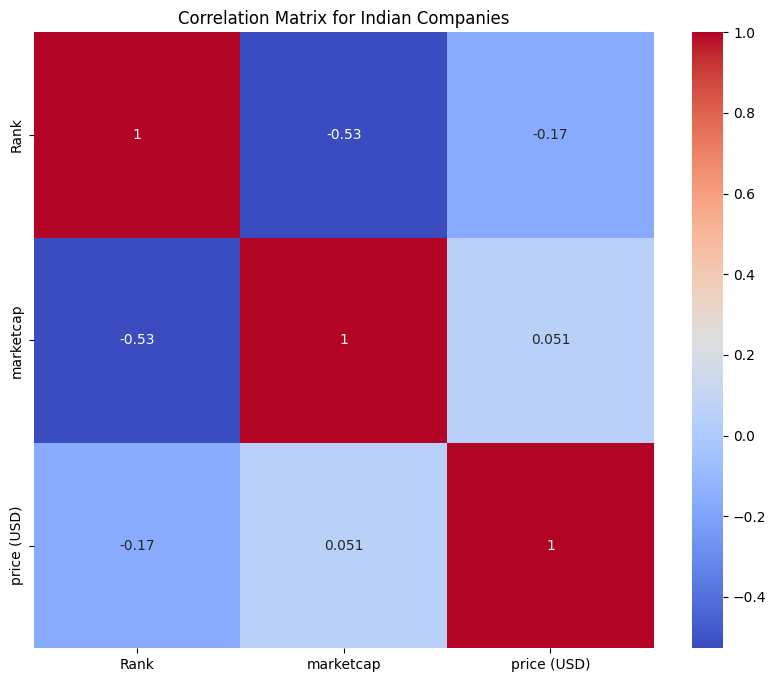

In [49]:
numerical_indian_companies = indian_companies.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_indian_companies.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Indian Companies')
plt.show()

              Rank     marketcap   price (USD)
count  3706.000000  3.706000e+03   3706.000000
mean   5003.621155  1.539872e+10     65.476483
std    2834.583385  1.127327e+11    288.176675
min       1.000000  0.000000e+00      0.000100
25%    2593.250000  2.079950e+08      5.250000
50%    5153.500000  1.183152e+09     19.895000
75%    7547.750000  5.486292e+09     59.517500
max    9419.000000  3.443577e+12  12000.000000


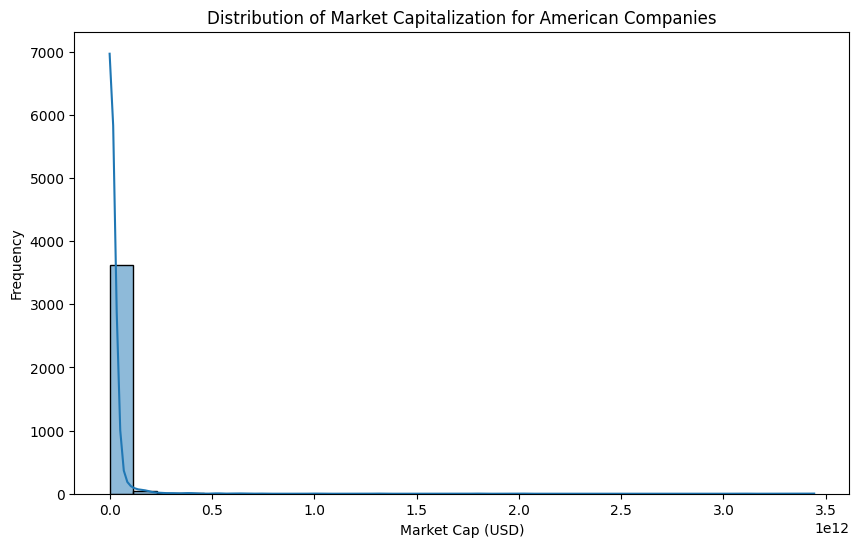

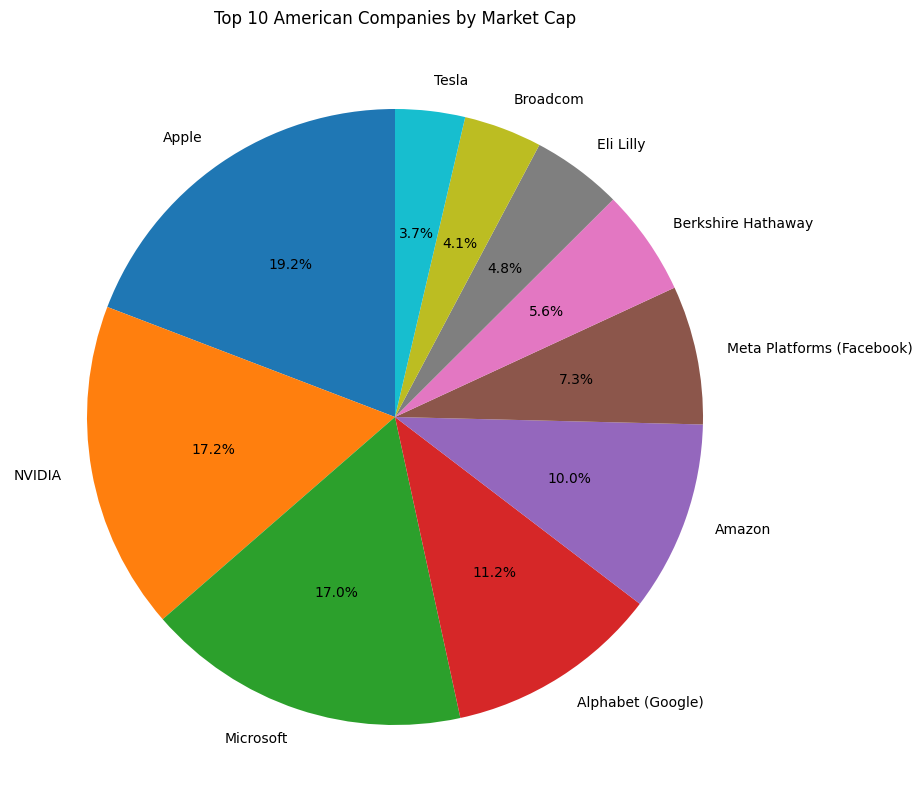

Gradient Boosting Metrics:
Mean Squared Error: 3.962683078479362e+21
Root Mean Squared Error: 62949845738.32856
R-squared: 0.0510477860338473


In [57]:
american_companies = df[df['country_United States'] == 1]

print(american_companies.describe())

plt.figure(figsize=(10, 6))
sns.histplot(american_companies['marketcap'], bins=30, kde=True)
plt.title('Distribution of Market Capitalization for American Companies')
plt.xlabel('Market Cap (USD)')
plt.ylabel('Frequency')
plt.show()

top_10_us = american_companies.nlargest(10, 'marketcap')
plt.figure(figsize=(10, 10))
plt.pie(top_10_us['marketcap'], labels=top_10_us['Name'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 American Companies by Market Cap')
plt.show()


from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Metrics:")
print(f"Mean Squared Error: {mse_gb}")
print(f"Root Mean Squared Error: {rmse_gb}")
print(f"R-squared: {r2_gb}")

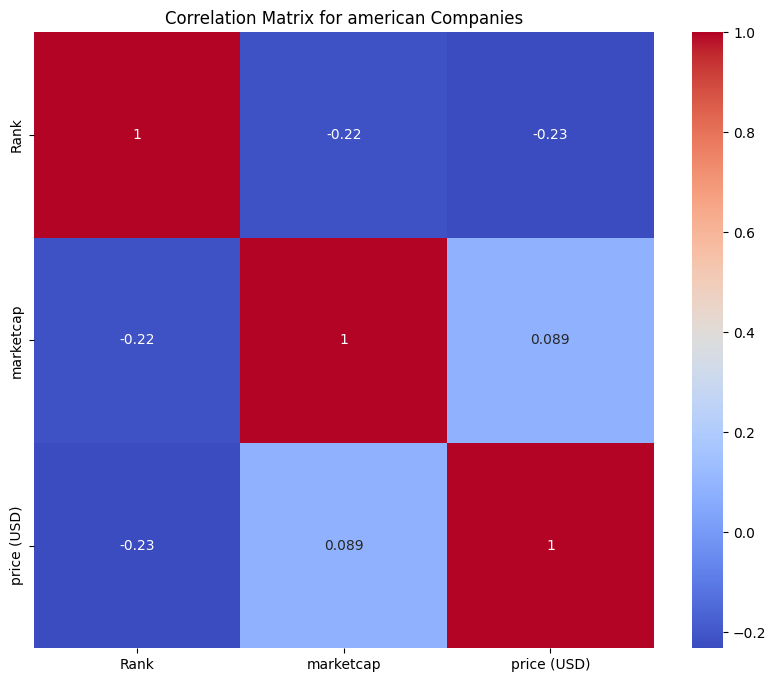

In [55]:
numerical_american_companies = american_companies.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_american_companies.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for american Companies')
plt.show()

              Rank     marketcap  price (USD)
count   318.000000  3.180000e+02   318.000000
mean   4027.119497  1.959587e+10     7.034178
std    3163.747753  4.672925e+10    19.251982
min      19.000000  1.051200e+04     0.000100
25%    1122.750000  2.908834e+08     0.904425
50%    3089.500000  4.016446e+09     1.900790
75%    7178.750000  1.667768e+10     5.198740
max    9404.000000  4.518497e+11   198.723000


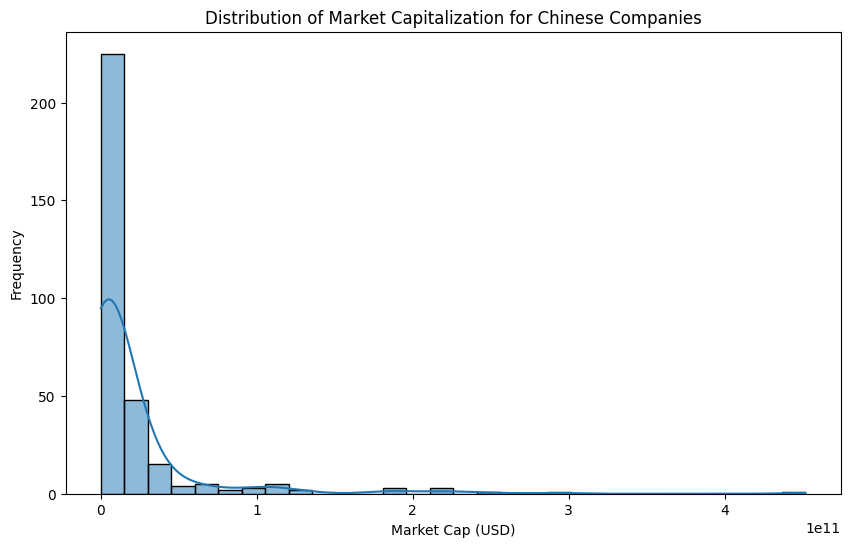

<ipython-input-56-84c0f0f04127>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='marketcap', data=top_10_chinese, palette='viridis')


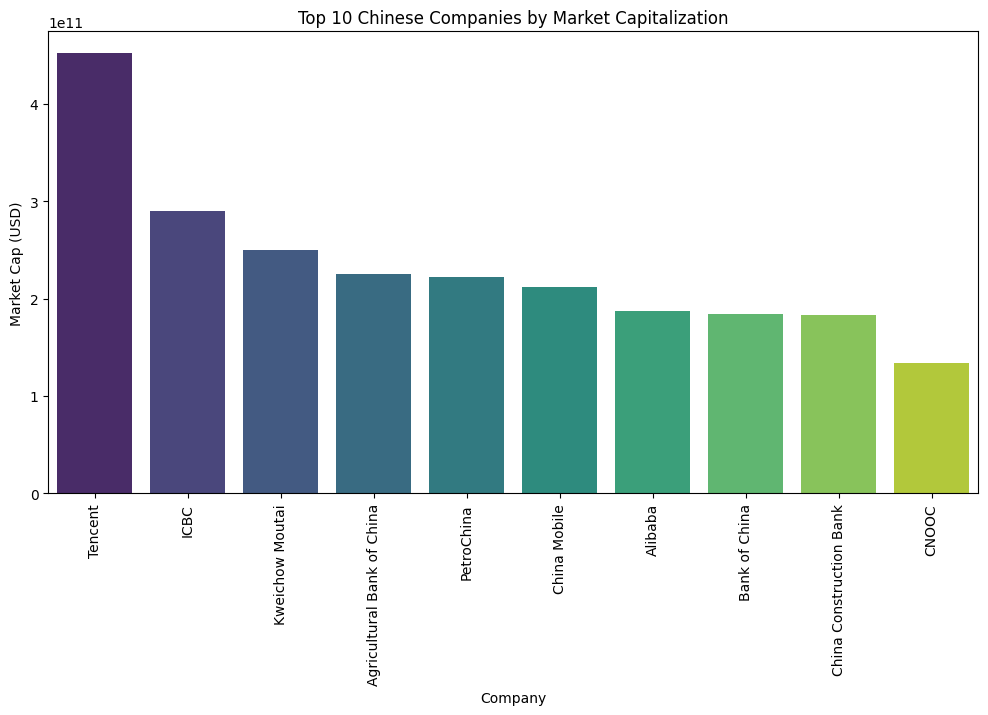

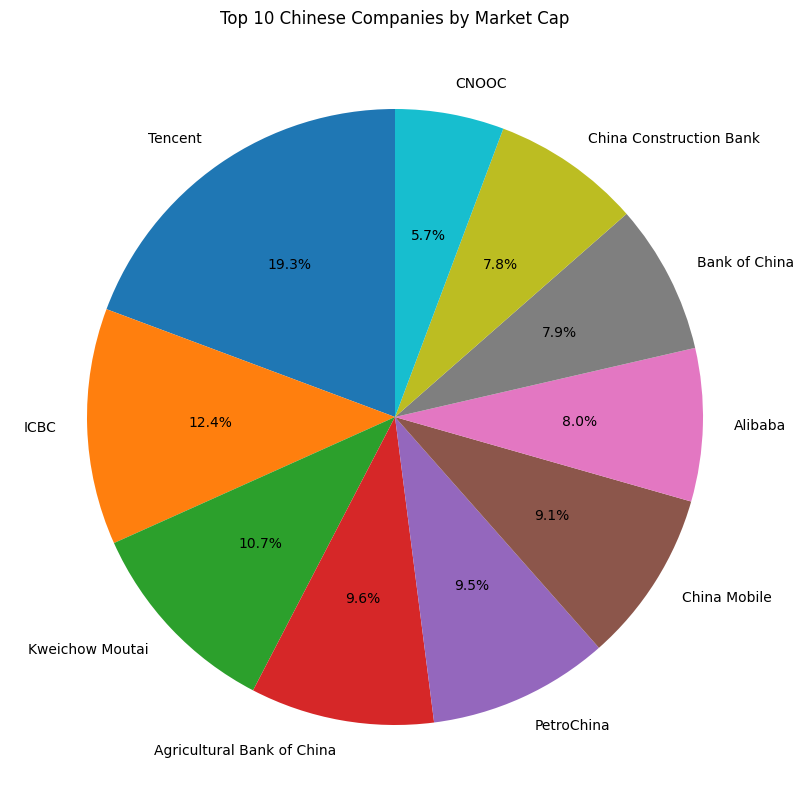

Support Vector Regression Metrics:
Mean Squared Error: 4.2879971049400707e+21
Root Mean Squared Error: 65482800069.484436
R-squared: -0.026855861452036445


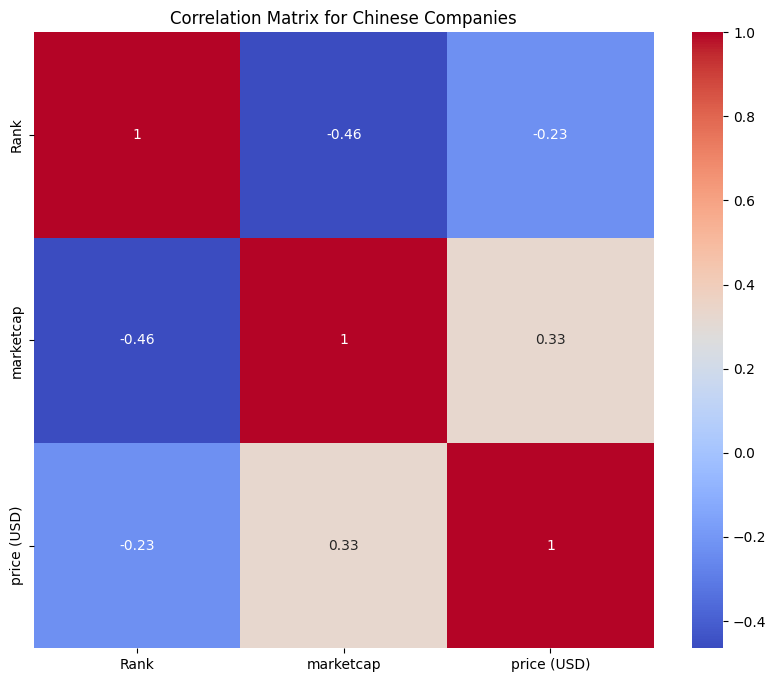

In [56]:
chinese_companies = df[df['country_China'] == 1]

print(chinese_companies.describe())


plt.figure(figsize=(10, 6))
sns.histplot(chinese_companies['marketcap'], bins=30, kde=True)
plt.title('Distribution of Market Capitalization for Chinese Companies')
plt.xlabel('Market Cap (USD)')
plt.ylabel('Frequency')
plt.show()

top_10_chinese = chinese_companies.sort_values('marketcap', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='marketcap', data=top_10_chinese, palette='viridis')
plt.title('Top 10 Chinese Companies by Market Capitalization')
plt.xlabel('Company')
plt.ylabel('Market Cap (USD)')
plt.xticks(rotation=90)
plt.show()



plt.figure(figsize=(10, 10))
plt.pie(top_10_chinese['marketcap'], labels=top_10_chinese['Name'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Chinese Companies by Market Cap')
plt.show()


from sklearn.svm import SVR
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mse_svr ** 0.5
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression Metrics:")
print(f"Mean Squared Error: {mse_svr}")
print(f"Root Mean Squared Error: {rmse_svr}")
print(f"R-squared: {r2_svr}")

numerical_chinese_companies = chinese_companies.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_chinese_companies.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Chinese Companies')
plt.show()